In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Import Risk INFORM index

In [3]:
path = "C:\\batch8_worldbank\\datasets\\tempetes\\INFORM_Risk_2021.xlsx"

In [5]:
xl = pd.ExcelFile(path)
xl.sheet_names

['Home',
 'Table of Contents',
 'INFORM Risk 2021 (a-z)',
 'Hazard & Exposure',
 'Vulnerability',
 'Lack of Coping Capacity',
 'Indicator Data',
 'Indicator Date',
 'Indicator Date hidden',
 'Indicator Date hidden2',
 'Indicator Source',
 'Indicator Data imputation',
 'Imputed and missing data hidden',
 'Lack of Reliability Index',
 'Indicator Metadata',
 'Regions']

In [9]:
inform_df = xl.parse(xl.sheet_names[2])
inform_df.columns = inform_df.iloc[0]
inform_df = inform_df[2:]
inform_df.head()

,COUNTRY,ISO3,Earthquake,Flood,Tsunami,Tropical Cyclone,Drought,Epidemic,Natural,Projected Conflict Risk,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
2,Afghanistan,AFG,9.7,7.2,0,0,8.4,6.9,6.7,10,...,7.3,7.3,8.1,Very High,2,2.77477,4,0.0784314,YES,0.216216
3,Albania,ALB,9.3,4.7,7.8,0,6.9,4.8,6.4,0.9,...,2.1,4.1,2.9,Low,120,3.68627,10,0.196078,NaN,0.191176
4,Algeria,DZA,8.8,5.2,4.6,0,2.3,3.4,4.7,6.8,...,3.8,4.4,3.9,Medium,84,2.82963,2,0.0392157,NaN,0.430556
5,Angola,AGO,0.1,5.1,0,0,3.7,6.6,3.1,5.5,...,7.5,6.9,5,High,47,1.44144,0,0,NaN,0.27027
6,Antigua and Barbuda,ATG,5.2,0.1,0,8.4,0,3.5,3.7,0,...,1.4,3.5,2.2,Low,147,4.94624,19,0.372549,NaN,0.177419


# Import emdat

In [11]:
path = "C:\\batch8_worldbank\\datasets\\tempetes\\wb_disasters_bdd.xlsx"

In [12]:
disasters_df = pd.read_excel(path)
disasters_df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1904-0003-BGD,1904,3,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,OFDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
3,1906-0023-BEL,1906,23,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
4,1906-0024-BEL,1906,24,Natural,Hydrological,Flood,NaN,NaN,NaN,Govern,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300


In [13]:
disasters_df['ISO']

0        CPV
1        IND
2        BGD
3        BEL
4        BEL
        ... 
10944    YEM
10945    YEM
10946    YEM
10947    COD
10948    TLS
Name: ISO, Length: 10949, dtype: object

In [14]:
max(disasters_df['Year'])

2020

# Filter on storms

In [15]:
storms_df = disasters_df[disasters_df["Disaster Type"]=="Storm"]

# Number of storms, nb people affected and total damages by country by decade

In [16]:
nb_storms_by_year_by_country = storms_df.groupby(["Start Year", "ISO"]).aggregate({"Disaster Type":"count", "No Affected": "sum", "Total Damages ('000 US$)":"sum"})
nb_storms_by_year_by_country = nb_storms_by_year_by_country.reset_index()
nb_storms_by_year_by_country = nb_storms_by_year_by_country.rename(columns={"Start Year": "year", "Disaster Type": "storms_count", "No Affected": "total_nb_affected", "Total Damages ('000 US$)": "total_damages"})

In [18]:
nb_storms_by_year_by_country["decade"] = nb_storms_by_year_by_country["year"].apply(lambda row: (row//10)*10)
nb_storms_by_decade_by_country = nb_storms_by_year_by_country.groupby(["decade", "ISO"]).aggregate({"storms_count":"sum", "total_nb_affected":"sum", "total_damages":"sum"})
nb_storms_by_decade_by_country = nb_storms_by_decade_by_country.reset_index()

In [20]:
nb_storms_by_decade_by_country.head()

,decade,ISO,storms_count,total_nb_affected,total_damages
0,1900,BGD,3,0.0,0.0
1,1900,HKG,1,0.0,20000.0
2,1900,HTI,1,0.0,0.0
3,1900,JAM,1,0.0,0.0
4,1900,MMR,1,0.0,0.0


In [21]:
max(nb_storms_by_decade_by_country["decade"])

2020

# Filter on nb_storms_by_decade_by_country decade 2020

In [27]:
nb_storms_by_decade_by_country_2020 = nb_storms_by_decade_by_country[nb_storms_by_decade_by_country["decade"]>=2000]

In [28]:
nb_storms_by_decade_by_country_2020.head()

,decade,ISO,storms_count,total_nb_affected,total_damages
486,2000,AFG,3,22656.0,5000.0
487,2000,ALB,2,525000.0,0.0
488,2000,ARG,8,6400.0,15000.0
489,2000,ASM,2,20000.0,150000.0
490,2000,ATG,1,25800.0,0.0


In [29]:
nb_storms_by_decade_by_country_2020.shape

(333, 5)

In [30]:
nb_storms_by_decade_by_country_2020.columns

Index(['decade', 'ISO', 'storms_count', 'total_nb_affected', 'total_damages'], dtype='object')

In [31]:
inform_df.columns

Index(['COUNTRY', 'ISO3', 'Earthquake', 'Flood', 'Tsunami', 'Tropical Cyclone',
       'Drought', 'Epidemic', 'Natural', 'Projected Conflict Risk',
       'Current Highly Violent Conflict Intensity', 'Human',
       'HAZARD & EXPOSURE', 'Development & Deprivation', 'Inequality',
       'Economic Dependency', 'Socio-Economic Vulnerability',
       'Uprooted people', 'Health Conditions', 'Children U5', 'Recent Shocks',
       'Food Security', 'Other Vulnerable Groups', 'Vulnerable Groups',
       'VULNERABILITY', 'DRR', 'Governance', 'Institutional', 'Communication',
       'Physical infrastructure', 'Access to health care', 'Infrastructure',
       'LACK OF COPING CAPACITY', 'INFORM RISK', 'RISK CLASS', 'Rank',
       'Lack of Reliability (*)', 'Number of Missing Indicators',
       '% of Missing Indicators', 'Countries in HVC',
       'Recentness data (average years)'],
      dtype='object', name=0)

In [ ]:
# Merge on ISO

In [32]:
nb_storms_by_decade_by_country_2020_with_inform = pd.merge(nb_storms_by_decade_by_country_2020, inform_df, how="left", left_on="ISO", right_on="ISO3")

In [33]:
nb_storms_by_decade_by_country_2020_with_inform.head()

,decade,ISO,storms_count,total_nb_affected,total_damages,COUNTRY,ISO3,Earthquake,Flood,Tsunami,...,Infrastructure,LACK OF COPING CAPACITY,INFORM RISK,RISK CLASS,Rank,Lack of Reliability (*),Number of Missing Indicators,% of Missing Indicators,Countries in HVC,Recentness data (average years)
0,2000,AFG,3,22656.0,5000.0,Afghanistan,AFG,9.7,7.2,0,...,7.3,7.3,8.1,Very High,2,2.77477,4,0.0784314,YES,0.216216
1,2000,ALB,2,525000.0,0.0,Albania,ALB,9.3,4.7,7.8,...,2.1,4.1,2.9,Low,120,3.68627,10,0.196078,NaN,0.191176
2,2000,ARG,8,6400.0,15000.0,Argentina,ARG,6.7,6.5,0,...,2,3.4,2.6,Low,126,2.85926,6,0.117647,NaN,0.236111
3,2000,ASM,2,20000.0,150000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ATG,1,25800.0,0.0,Antigua and Barbuda,ATG,5.2,0.1,0,...,1.4,3.5,2.2,Low,147,4.94624,19,0.372549,NaN,0.177419


In [34]:
nb_storms_by_decade_by_country_2020_with_inform.shape

(333, 46)

In [45]:
nb_storms_by_decade_by_country_2020_with_inform_filt_col = nb_storms_by_decade_by_country_2020_with_inform[["decade", "ISO", "storms_count", "total_nb_affected", "total_damages","INFORM RISK"]]

In [46]:
nb_storms_by_decade_by_country_2020_with_inform_filt_col.dtypes

decade                 int64
ISO                   object
storms_count           int64
total_nb_affected    float64
total_damages        float64
INFORM RISK           object
dtype: object

In [47]:
nb_storms_by_decade_by_country_2020_with_inform_filt_col["INFORM RISK"] = nb_storms_by_decade_by_country_2020_with_inform_filt_col["INFORM RISK"].astype("float")

C:\Users\clotilde.pety\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
nb_storms_by_decade_by_country_2020_with_inform_filt_col.head()

,decade,ISO,storms_count,total_nb_affected,total_damages,INFORM RISK
0,2000,AFG,3,22656.0,5000.0,8.1
1,2000,ALB,2,525000.0,0.0,2.9
2,2000,ARG,8,6400.0,15000.0,2.6
3,2000,ASM,2,20000.0,150000.0,NaN
4,2000,ATG,1,25800.0,0.0,2.2


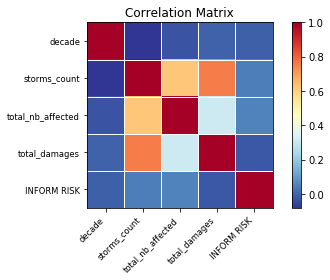

In [49]:
corr = nb_storms_by_decade_by_country_2020_with_inform_filt_col.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Sur un échantillon plus petit

In [50]:
nb_storms_inform_by_country_2020_only = nb_storms_by_decade_by_country_2020_with_inform_filt_col[nb_storms_by_decade_by_country_2020_with_inform_filt_col["decade"]==2020]

In [51]:
nb_storms_inform_by_country_2020_only.head()

,decade,ISO,storms_count,total_nb_affected,total_damages,INFORM RISK
294,2020,AFG,1,7441.0,0.0,8.1
295,2020,AUS,1,0.0,430000.0,2.4
296,2020,BEL,1,0.0,0.0,1.9
297,2020,BGD,1,1100000.0,1500000.0,5.8
298,2020,BRA,1,1119.0,0.0,4.8


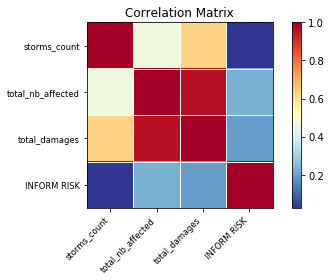

In [53]:
nb_storms_inform_by_country_2020_only_cor = nb_storms_inform_by_country_2020_only[["ISO", "storms_count", "total_nb_affected", "total_damages","INFORM RISK"]]
corr = nb_storms_inform_by_country_2020_only_cor.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()